# Additional information with the `utils` module
In the `utils` module, an `add_all_info` function add to your dataset all the information that HuracanPy may compute. Submodules allow for the computation of individual attributes.

In [5]:
import seaborn as sns

import huracanpy

# Load tracks
file = huracanpy.example_year_file
data = huracanpy.load(file)

list(data.keys())  # Available attributes

['track_id',
 'year',
 'month',
 'day',
 'hour',
 'i',
 'j',
 'lon',
 'lat',
 'slp',
 'zs',
 'wind10',
 'time']

In [6]:
# Add info
data = huracanpy.utils.add_all_info(data, slp_units="Pa")

list(data.keys())  # Available attributes

['track_id',
 'year',
 'month',
 'day',
 'hour',
 'i',
 'j',
 'lon',
 'lat',
 'slp',
 'zs',
 'wind10',
 'time',
 'hemisphere',
 'basin',
 'is_ocean',
 'country',
 'continent',
 'season',
 'sshs',
 'pres_cat']

## Geographical attributes

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

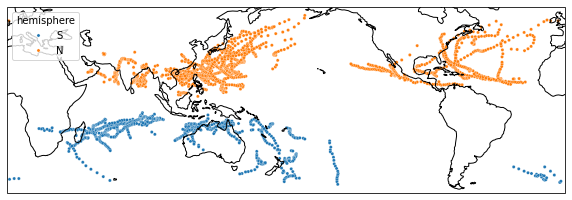

In [11]:
# hemisphere, can also be obtained with huracanpy.utils.geography.get_hemisphere
huracanpy.plot.plot_tracks_basic(
    data, intensity_var="hemisphere", scatter_kws=dict(s=10)
)

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

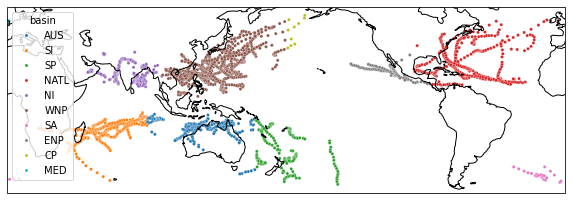

In [12]:
# basin, can also be obtained with huracanpy.utils.geography.get_basin (NB: Several convention available)
huracanpy.plot.plot_tracks_basic(data, intensity_var="basin", scatter_kws=dict(s=10))

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

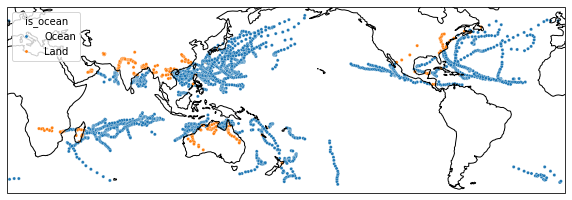

In [13]:
# is_ocean, can also be obtained with huracanpy.utils.geography.get_is_ocean
huracanpy.plot.plot_tracks_basic(data, intensity_var="is_ocean", scatter_kws=dict(s=10))

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

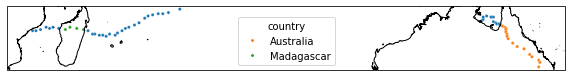

In [20]:
# country, can also be obtained with huracanpy.utils.geography.get_country
huracanpy.plot.plot_tracks_basic(
    data.isel(record=slice(0, 60)), intensity_var="country", scatter_kws=dict(s=10)
)

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

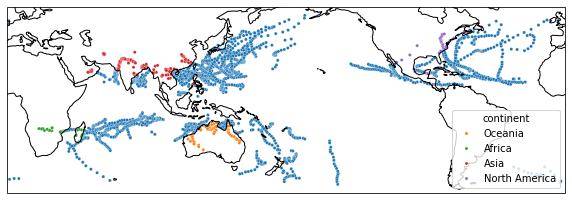

In [24]:
# continent, can also be obtained with huracanpy.utils.geography.get_country
huracanpy.plot.plot_tracks_basic(
    data, intensity_var="continent", scatter_kws=dict(s=10)
)

# Time attributes

<Axes: xlabel='time', ylabel='hemisphere'>

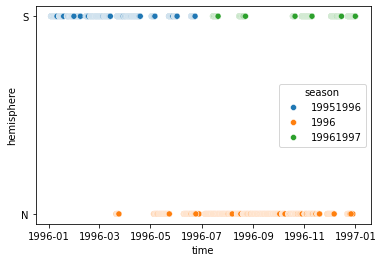

In [35]:
# Season. Can also be obtained with huracanpy.utils.time.get_season
sns.scatterplot(data=data, x="time", y="hemisphere", hue="season")

# Categories

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

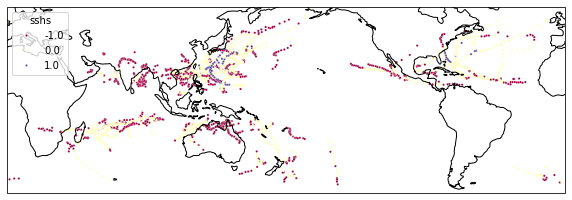

In [40]:
# sshs, can also be obtained with huracanpy.utils.category.get_sshs_cat
huracanpy.plot.plot_tracks_basic(
    data, intensity_var="sshs", scatter_kws=dict(s=5, palette="Spectral")
)

(<Figure size 720x720 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

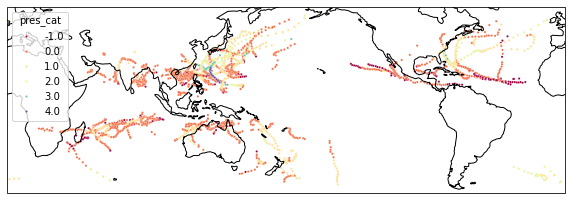

In [41]:
# pressure category, can also be obtained with huracanpy.utils.category.get_pres_cat
huracanpy.plot.plot_tracks_basic(
    data, intensity_var="pres_cat", scatter_kws=dict(s=5, palette="Spectral")
)